In [1]:
import matplotlib.pyplot as plt
import numpy as np
import HamiltonianPy as hp
import itertools as it
from matplotlib.patches import Arc,RegularPolygon
from numpy import radians as rad

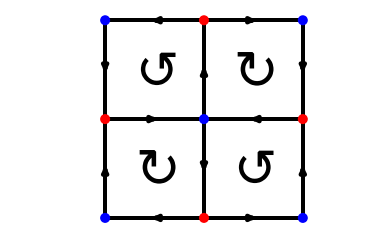

In [2]:
ax=plt.gca()
ax.axis('off')
ax.axis('equal')
ax.set_xlim(-0.1,2.1)
ax.set_ylim(-0.1,2.1)
P,t1,t2=np.array([0.0,0.0]),np.array([1.0,0.0]),np.array([0.0,1.0])
lattice=hp.Lattice(name='2DFB',rcoords=hp.tiling(cluster=[P],vectors=[t1,t2],translations=it.product(range(3),range(3))),neighbours=1)
for bond in lattice.bonds:
    p1,p2=bond.spoint,bond.epoint
    if bond.neighbour==0:
        ax.scatter(p1.rcoord[0],p1.rcoord[1],s=100,edgecolors='none',color='blue' if p1.pid.site%2==0 else 'red',zorder=3)
    elif bond.neighbour==1:
        ax.plot([p1.rcoord[0],p2.rcoord[0]],[p1.rcoord[1],p2.rcoord[1]],lw=4,color='black',zorder=2)
        theta,s1,s2=hp.azimuthd(bond.rcoord),p1.pid.site%2,p2.pid.site%2
        if np.allclose(theta,0.0) or np.allclose(theta,180.0):
            coeff=1 if (s1,s2)==(0,1) else -1
        else:
            coeff=-1 if (s1,s2)==(0,1) else 1
        center,direction=(p1.rcoord+p2.rcoord)/2,bond.rcoord/10*coeff
        ax.annotate(s='',xy=center-direction/2,xytext=center+direction/2,arrowprops={'color':'black','linewidth':4.5,'arrowstyle':'->','zorder':3})
ax.plot([0.5],[0.5],marker=r'$\circlearrowright$',markersize=40,markeredgewidth=0.01,color='black')
ax.plot([1.5],[0.5],marker=r'$\circlearrowleft$',markersize=40,markeredgewidth=0.01,color='black')
ax.plot([0.5],[1.5],marker=r'$\circlearrowleft$',markersize=40,markeredgewidth=0.01,color='black')
ax.plot([1.5],[1.5],marker=r'$\circlearrowright$',markersize=40,markeredgewidth=0.01,color='black')
plt.savefig("flux.pdf")
plt.show()